# Calculating XY Tool offsets Helper Notebook

In [1]:
from MachineUtils import *
from CameraUtils import *

In [2]:
# Setup your machine connection
# List available ports in thie cell

ports = serial.tools.list_ports.comports()
print([port.name for port in ports]) 

['ttyACM0', 'ttyAMA0']


In [3]:
# Choose the correct port from above and establish connection with machine
port = '/dev/ttyACM0'
m = MachineCommunication(port)

In [ ]:
# Make sure no XY tool offsets are set for your second tool
# TODO: send G10 commands from jupyter
# for now, send from duet console

In [ ]:
# Pick up the first tool and move it to a reference position (e.g. 150, 150)
m.toolChange(1)
m.moveTo(x=150, y=150)

In [48]:
# Move the bed down and install the USB microscope onto the bed facing up
# then manually move it until the tool is centered
# I recommend running 'vlc' from the command line to see where you are
m.moveTo(z=150)

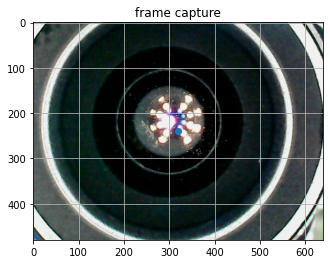

True

In [10]:
# once the tool is centered, take a pic of the first tool
# (close vlc/any video player so we have access to the camera here)
%matplotlib inline
tool1 = getFrameCamera(0)
showFrame(tool1, grid=True)
cv2.imwrite("/home/pi/rpitool1.jpg", tool1)

In [53]:
# now pick up the second tool & move it to the reference point
m.toolChange(2)
m.moveTo(x=150, y=150)

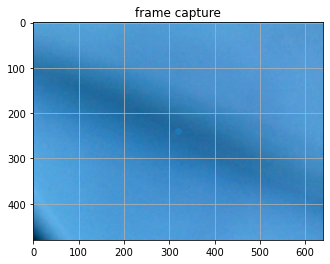

In [15]:
# take a picture of the second tool
tool2 = getFrameCamera(0)
showFrame(tool2, grid=True)
#cv2.imwrite("/home/pi/rpitool2.jpg", tool2)

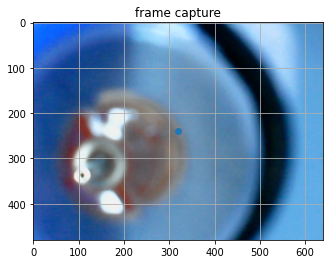

In [88]:
# compare the two pictures above
# decide which direction the second tool needs to move to be centered
# m.moveTo(x=150, y=150) # change based on your picture

tool2 = getFrameCamera(1)
showFrame(tool2, grid=True)

In [ ]:
# subtract your final values above from 150 - this is your XY tool offset
# BUT I have X-4.5 Y44.04 in TOffsets.g for p2 already. so... add them to this gets me 
# the right Toffset
#e.g. if the center of syringe was 152.4, 154.5, then i apply -4.5-2.4 = -6.9, 44.04 - 4.5 = 39.54
# --> G10 P2 X-6.9 Y39.54
# Apply directly in GCode
# TODO: add G10 commands from jupyter
# for now, send from duet console

In [39]:
# Now move to the reference point
# the tool should be centered (i.e. not move)
m.moveTo(x=150, y=150)

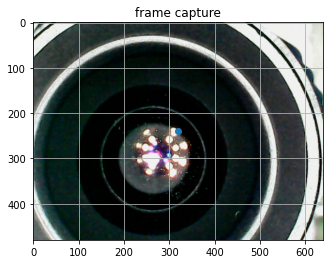

In [42]:
# # Do a toolchange from scratch to make sure
# m.toolChange(1)
# m.toolChange(2)
# m.moveTo(x=150, y=150)
toolCheck = getFrameCamera(1)
showFrame(toolCheck, grid=True)